In [1]:
import ee
import os
import re
import glob
import geemap
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from scipy.stats import norm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [25]:
# load the CSV file using pandas
df = pd.read_csv('G:/001Project/Output/Sheets/original_Results/precipitation/NLDAS/2016/NLDAS_PRC_Batch_1_2016.csv')

df.head(24)

,system:index,CLIMATE,COUNTY,CROP_DIV,CROP_ID,CROP_TYPE,FRSTDIVTXT,GEOID,IRR_ID,LN_ID,STATE,total_precipitation_max,total_precipitation_mean,total_precipitation_stdDev,.geo
0,000000000000000050f5_0,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0000,0.0000,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,000000000000000050f5_1,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0000,0.0000,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,000000000000000050f5_2,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0000,0.0000,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,000000000000000050f5_3,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0000,0.0000,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,000000000000000050f5_4,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0000,0.0000,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
5,000000000000000050f5_5,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0000,0.0000,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
6,000000000000000050f5_6,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0000,0.0000,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
7,000000000000000050f5_7,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,1.5240,1.5240,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
8,000000000000000050f5_8,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0000,0.0000,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}"
9,000000000000000050f5_9,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0070,0.0070,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [9]:
# Extract the start date using regular expressions
start_date = df['system:index'].str.extract(r'_(\d{8})')

# Rename the column
start_date.columns = ['Start_Date']

# Add the start date column to the original DataFrame
df['dDate'] = start_date['Start_Date']

#df["dDate"] = pd.to_datetime(df["system:index"].str.split("_").str[-1], format='%Y%m%d')

#df = df.drop(['system:index', '.geo', 'prcp_stdDev', 'prcp_mean', 'CROP_TYPE', 'FRSTDIVTXT', 'GEOID'], axis=1)

df.head()

,system:index,CLIMATE,COUNTY,CROP_DIV,CROP_ID,CROP_TYPE,FRSTDIVTXT,GEOID,IRR_ID,LN_ID,STATE,total_precipitation_max,total_precipitation_mean,total_precipitation_stdDev,.geo,dDate
0,000000000000000050f5_0,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0,0.0,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN
1,000000000000000050f5_1,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0,0.0,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN
2,000000000000000050f5_2,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0,0.0,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN
3,000000000000000050f5_3,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0,0.0,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN
4,000000000000000050f5_4,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.0,0.0,0.0,"{""type"":""MultiPoint"",""coordinates"":[]}",NaN


In [6]:
df = df.drop(['system:index', '.geo', 'prcp_stdDev', 'prcp_mean', 'CROP_TYPE', 'FRSTDIVTXT', 'GEOID'], axis=1)

In [14]:
# Convert the 'Start Date' column to datetime index
df['dDate'] = pd.to_datetime(df['dDate'], format='%Y%m%d')

# # Set the 'Start Date' column as the index
#df.set_index('dDate', inplace=False)
df.head()

,system:index,CLIMATE,COUNTY,CROP_DIV,CROP_TYPE,FRSTDIVTXT,GEOID,LN_ID,STATE,prcp_mean,prcp_stdDev,prcp_sum,.geo,dDate
0,00000000000000002a55_20160101,BSk,Chaves,5,Sorghum,Section,35005,681736,New Mexico,0.0,0.0,0.000000,"{""type"":""Polygon"",""coordinates"":[[[-103.650176...",2016-01-01
1,00000000000000002a55_20160102,BSk,Chaves,5,Sorghum,Section,35005,681736,New Mexico,0.0,0.0,0.000000,"{""type"":""Polygon"",""coordinates"":[[[-103.650176...",2016-01-02
2,00000000000000002a55_20160103,BSk,Chaves,5,Sorghum,Section,35005,681736,New Mexico,0.0,0.0,0.000000,"{""type"":""Polygon"",""coordinates"":[[[-103.650176...",2016-01-03
3,00000000000000002a55_20160104,BSk,Chaves,5,Sorghum,Section,35005,681736,New Mexico,0.0,0.0,0.000000,"{""type"":""Polygon"",""coordinates"":[[[-103.650176...",2016-01-04
4,00000000000000002a55_20160105,BSk,Chaves,5,Sorghum,Section,35005,681736,New Mexico,1.8,0.0,27.197646,"{""type"":""Polygon"",""coordinates"":[[[-103.650176...",2016-01-05


In [43]:
# Extract year and month from 'Date' column
df['Date'] = df['dDate'] + pd.offsets.MonthEnd(0)

# Group by 'LN_ID' and 'YearMonth', and calculate the sum of 'prcp_sum'
monthly_totals = df.groupby(['Date', 'LN_ID', 'COUNTY', 'STATE',
                           'CROP_DIV', 'CLIMATE'])['prcp_mean'].sum().reset_index()

monthly_totals.set_index('Date', inplace=True)

,LN_ID,COUNTY,STATE,CROP_DIV,CLIMATE,prcp_mean
Date,,,,,,
2016-01-31,477868,Lea,New Mexico,5,BSk,8.030000
2016-01-31,477915,Lea,New Mexico,2,BSk,7.787310
2016-01-31,484919,Lea,New Mexico,1,BSk,8.180000
2016-01-31,484935,Lea,New Mexico,1,BSk,8.110000
2016-01-31,484945,Lea,New Mexico,1,BSk,7.320000
...,...,...,...,...,...,...
2016-12-31,2700440,Lea,New Mexico,5,BSk,10.586205
2016-12-31,2700481,Lea,New Mexico,5,BSk,10.751993
2016-12-31,2700640,Lea,New Mexico,7,BSk,11.320987


In [44]:
# Sort the data by 'LN_ID'
monthly_totals = monthly_totals.sort_values(['LN_ID', 'Date'])
monthly_totals.head(60)

,Date,LN_ID,COUNTY,STATE,CROP_DIV,CLIMATE,prcp_mean
0,2016-01-31,477868,Lea,New Mexico,5,BSk,8.030000
4000,2016-02-29,477868,Lea,New Mexico,5,BSk,6.700000
8000,2016-03-31,477868,Lea,New Mexico,5,BSk,10.310000
12000,2016-04-30,477868,Lea,New Mexico,5,BSk,25.449999
16000,2016-05-31,477868,Lea,New Mexico,5,BSk,17.030000
20000,2016-06-30,477868,Lea,New Mexico,5,BSk,10.270000
24000,2016-07-31,477868,Lea,New Mexico,5,BSk,4.270000
28000,2016-08-31,477868,Lea,New Mexico,5,BSk,149.189999
32000,2016-09-30,477868,Lea,New Mexico,5,BSk,51.639999
36000,2016-10-31,477868,Lea,New Mexico,5,BSk,8.570000


In [55]:
selected_row = monthly_totals[monthly_totals['LN_ID'] == 477868]
selected_row.head(20)

,Date,LN_ID,COUNTY,STATE,CROP_DIV,CLIMATE,prcp_mean
0,2016-01-31,477868,Lea,New Mexico,5,BSk,8.030000
4000,2016-02-29,477868,Lea,New Mexico,5,BSk,6.700000
8000,2016-03-31,477868,Lea,New Mexico,5,BSk,10.310000
12000,2016-04-30,477868,Lea,New Mexico,5,BSk,25.449999
16000,2016-05-31,477868,Lea,New Mexico,5,BSk,17.030000
20000,2016-06-30,477868,Lea,New Mexico,5,BSk,10.270000
24000,2016-07-31,477868,Lea,New Mexico,5,BSk,4.270000
28000,2016-08-31,477868,Lea,New Mexico,5,BSk,149.189999
32000,2016-09-30,477868,Lea,New Mexico,5,BSk,51.639999
36000,2016-10-31,477868,Lea,New Mexico,5,BSk,8.570000


<AxesSubplot:xlabel='Date'>

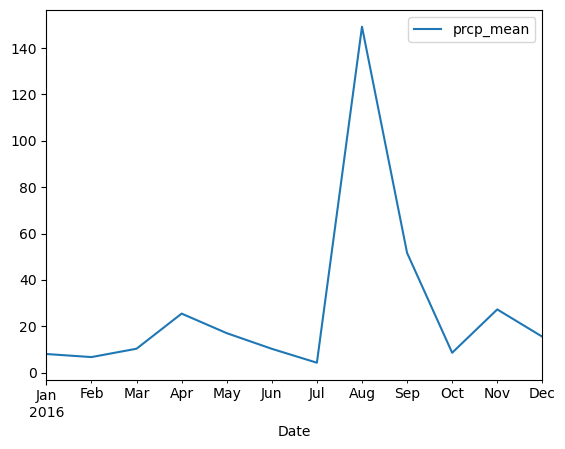

In [56]:
selected_row.plot('Date', 'prcp_mean')

## Only modify date column for single files

In [41]:
%%time

import pandas as pd

# Path to the CSV file
csv_file_path = 'G:/001Project/Output/Sheets/original_Results/precipitation/PRISM/PRISM_PRC_2016.csv'

# Output directory
out_dir = 'G:/001Project/Output/Sheets/cleaned_Results/precipitation/PRISM/'

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Extract year and month from 'system:index'
df['Date'] = df['system:index'].str.extract(r'_(\d{6})')

# Convert 'YearMonth' to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m') + pd.offsets.MonthEnd(0)

# Group by specific columns and calculate the sum of 'precipitation_mean'
# grouped_sum = df.groupby(['LN_ID', 'Date', 'CLIMATE', 'COUNTY', 'CROP_DIV', 'STATE'])['precipitation_mean'].sum().reset_index()

# Save the aggregated data to a new CSV file
output_csv_path = out_dir + 'PRISM_PRC_2016.csv'
df.to_csv(output_csv_path, index=False)

df.head()  # Display the first few rows of the aggregated data

CPU times: total: 13 s
Wall time: 37.7 s


,system:index,CLIMATE,COUNTY,CROP_DIV,CROP_ID,CROP_TYPE,FRSTDIVTXT,GEOID,IRR_ID,LN_ID,STATE,ppt_mean,ppt_stdDev,ppt_sum,.geo,Date
0,000000000000000050f5_201601,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.430,0.0,0.246196,"{""type"":""MultiPoint"",""coordinates"":[]}",2016-01-31
1,000000000000000050f5_201602,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,4.204,0.0,2.406996,"{""type"":""MultiPoint"",""coordinates"":[]}",2016-02-29
2,000000000000000050f5_201603,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,0.337,0.0,0.192949,"{""type"":""MultiPoint"",""coordinates"":[]}",2016-03-31
3,000000000000000050f5_201604,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,103.875,0.0,59.473529,"{""type"":""MultiPoint"",""coordinates"":[]}",2016-04-30
4,000000000000000050f5_201605,BSk,Baca,1,4,Sorghum,Section,8009,2220547,652748,Colorado,19.730,0.0,11.296392,"{""type"":""MultiPoint"",""coordinates"":[]}",2016-05-31


## Combine all datasets and aggregate to monthly values for batch files

In [10]:
%%time

# List all CSV files in the directory
csv_files = glob.glob('G:/001Project/Output/Sheets/original_Results/precipitation/GRIDMET/2016/*.csv')

#output directory
out_dir = 'G:/001Project/Output/Sheets/cleaned_Results/precipitation/GRIDMET/'

# Create an empty list to store the aggregated data
all_data = []

# Iterate over each CSV file
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    start_date = df['system:index'].str.extract(r'_(\d{8})')

    # Rename the column
    start_date.columns = ['Start_Date']

    # Add the start date column to the original DataFrame
    df['dDate'] = start_date['Start_Date']

    # Convert 'Date' column to datetime type
    df['dDate'] = pd.to_datetime(df['dDate'])

    # Extract year and month from 'Date' column
    df['Date'] = df['dDate'] + pd.offsets.MonthEnd(0)

    # Group by 'LN_ID', 'YearMonth', and the other columns, and calculate the sum of 'prcp_sum'
    monthly_sum = df.groupby(['LN_ID', 'Date', 'CLIMATE', 'COUNTY', 'CROP_DIV', 'STATE'])['pr_mean'].sum().reset_index()
    
    # Drop all non-essential columns
    # monthly_sum = monthly_sum.drop(['system:index', '.geo', 'prcp_stdDev', 'prcp_sum', 'CROP_TYPE', 'FRSTDIVTXT', 'GEOID'], axis=1)

    # Append the aggregated data to the list
    all_data.append(monthly_sum)

# Concatenate all the dataframes into one
combined_data = pd.concat(all_data)

# Sort the combined data by 'LN_ID' and 'YearMonth'
combined_data = combined_data.sort_values(['LN_ID', 'Date'])

combined_data
# Save the aggregated data to a new CSV file
combined_data.to_csv(out_dir + 'GRIDMET_PRC_2016.csv', index=False)

CPU times: total: 2min 24s
Wall time: 5min 7s


## Combine data for NLDAS by first converting doy to Month-day calendar, aggregating to monthly sum

In [109]:
%%time

# List all CSV files in the directory
csv_files = glob.glob('G:/001Project/Output/Sheets/original_Results/precipitation/NLDAS/2021/*.csv')

#output directory
out_dir = 'G:/001Project/Output/Sheets/cleaned_Results/precipitation/NLDAS/'

# Create an empty list to store the aggregated data
all_data = []

# Function to convert day-of-year to month-day
def is_leap_year(year):
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        return True
    return False

def doy_to_month_day(year, day_of_year):
    days_in_month = [
        0,  # Placeholder for indexing (January has 31 days)
        31,  # January
        28,  # February (default)
        31,  # March
        30,  # April
        31,  # May
        30,  # June
        31,  # July
        31,  # August
        30,  # September
        31,  # October
        30,  # November
        31   # December
    ]
    
    if is_leap_year(year):
        days_in_month[2] = 29  # February in a leap year

    month = 1
    while day_of_year >= days_in_month[month]:
        day_of_year -= days_in_month[month]
        month += 1
    
    return f"{year}-{month:02d}-{(day_of_year + 1):02d}"  # Adding 1 to day_of_year to match your day numbering


# Iterate over each CSV file
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Extract day-of-year, convert to month-day, and create "Date" column
    df['Date'] = df['system:index'].apply(lambda x: doy_to_month_day(2021, int(x.split('_')[1]))) #Change to reflect year


    # Convert 'Date' column to datetime for proper grouping
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Group by 'LN_ID', 'Date', and the other columns, and calculate the sum of 'total_precipitation_mean'
    monthly_sum = df.groupby(['LN_ID', pd.Grouper(key='Date', freq='M'), 'CLIMATE', 'COUNTY', 'CROP_DIV', 'STATE'])['total_precipitation_mean'].sum().reset_index()
    
    # Drop all non-essential columns
    # monthly_sum = monthly_sum.drop(['system:index', '.geo', 'prcp_stdDev', 'prcp_sum', 'CROP_TYPE', 'FRSTDIVTXT', 'GEOID'], axis=1)

    # Append the aggregated data to the list
    all_data.append(monthly_sum)

# Concatenate all the dataframes into one
combined_data = pd.concat(all_data)

# Sort the combined data by 'LN_ID' and 'YearMonth'
combined_data = combined_data.sort_values(['LN_ID', 'Date'])

# Save the aggregated data to a new CSV file
combined_data.to_csv(out_dir + 'NLDAS_PRC_2021.csv', index=False)

CPU times: total: 2min 27s
Wall time: 4min 13s


In [ ]:
combined_data

,LN_ID,Date,CLIMATE,COUNTY,CROP_DIV,STATE,total_precipitation_mean
0,2401,2021-01-31,BSk,Lincoln,2,Colorado,10.9477
1,2401,2021-02-28,BSk,Lincoln,2,Colorado,9.0913
2,2401,2021-03-31,BSk,Lincoln,2,Colorado,50.4463
3,2401,2021-04-30,BSk,Lincoln,2,Colorado,31.6708
4,2401,2021-05-31,BSk,Lincoln,2,Colorado,107.8760
...,...,...,...,...,...,...,...
47995,2701145,2021-08-31,BSk,Yoakum,2,Texas,42.6520
47996,2701145,2021-09-30,BSk,Yoakum,2,Texas,7.7844
47997,2701145,2021-10-31,BSk,Yoakum,2,Texas,29.7792
47998,2701145,2021-11-30,BSk,Yoakum,2,Texas,0.7531


## Add Precipitation data to ET dateset

In [135]:
%%time

output_dir = 'G:/001Project/Output/Sheets/cleaned_Results/combined/'

# Read the CSV file
df1 = pd.read_csv('G:/001Project/Output/Sheets/cleaned_Results/combined/Combined_NLDAS_2018.csv')

## Uncomment two lines below for the first run with ET data
# df1_columns = ['DISALEXI_ET', 'EEMETRIC_ET', 'GEESEBAL_ET', 'PTJPL_ET', 'SIMS_ET', 'SSEBOP_ET']
# df1.columns = df1.columns.str.replace('_ET', '')

# CSV file with the new information
df2 = pd.read_csv('G:/001Project/Output/Sheets/cleaned_Results/precipitation/PRISM/PRISM_PRC_2018.csv')

# # Merge the two dataframes based on 'LN_ID' column
# merged_df = pd.merge(df1, df2[['LN_ID', 'prcp_mean']], on='LN_ID', how='left')

# Merge the two dataframes based on 'LN_ID' and 'Date' columns
merged_df = pd.merge(df1, df2[['LN_ID', 'Date', 'ppt_mean']], on=['LN_ID', 'Date'], how='left')

# Update the 'PRISM' column in the first dataframe
df1['PRISM'] = merged_df['ppt_mean']


# df1 = df1['system:index', 'LN_ID', 'FRSTDIVTXT', 'GEOID', 'COUNTY', 'STATE', 'CROP_DIV', 'CLIMATE', 'CROP_TYPE', 'DOM_CROP', 'ppt_max', 'ppt_mean', 'ppt_stdDev', '.geo']
    
# Generate the output file path
output_file = os.path.join(output_dir, 'Combined_PRISM_2018.csv')
#print(output_file)

# Save the updated dataframe to the output file
df1.to_csv(output_file, index=False)

print("DataFrame with modified additional precipitation data has been saved to '{}'.".format(output_file))

DataFrame with modified additional precipitation data has been saved to 'G:/001Project/Output/Sheets/cleaned_Results/combined/Combined_PRISM_2018.csv'.
CPU times: total: 30.4 s
Wall time: 2min 38s


In [134]:
df1

,Date,LN_ID,COUNTY,STATE,CROP_DIV,DOM_CROP,CLIMATE,DISALEXI,EEMETRIC,GEESEBAL,PTJPL,SIMS,SSEBOP,DAYMET,gridMET,IMERG,NLDAS,PRISM
0,2021-01-31,2401,Lincoln,Colorado,2,Dbl Crop WinWht/Sorghum,BSk,14.251130,20.281768,7.249121,7.887996,14.998493,3.168759,6.440000,7.700000,13.143227,10.9477,7.967400
1,2021-02-28,2401,Lincoln,Colorado,2,Dbl Crop WinWht/Sorghum,BSk,21.918132,29.006027,13.442993,9.814164,21.198895,7.977398,9.180000,13.000000,17.241057,9.0913,12.759200
2,2021-03-31,2401,Lincoln,Colorado,2,Dbl Crop WinWht/Sorghum,BSk,34.539930,26.901055,23.433953,12.606228,47.664992,0.932697,49.109999,58.100001,67.077602,50.4463,60.186100
3,2021-04-30,2401,Lincoln,Colorado,2,Dbl Crop WinWht/Sorghum,BSk,56.044199,69.911602,72.758915,38.418885,58.918132,15.607735,35.790000,44.800001,47.046059,31.6708,46.180698
4,2021-05-31,2401,Lincoln,Colorado,2,Dbl Crop WinWht/Sorghum,BSk,77.585635,62.423405,65.303365,93.637368,119.429935,64.770969,117.559999,152.000000,96.989841,107.8760,145.201492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378459,2021-08-31,2701145,Yoakum,Texas,2,Cotton,BSk,90.179852,115.744972,84.944177,124.595910,143.448999,106.785697,41.528938,43.635120,56.882268,42.6520,36.780098
1378460,2021-09-30,2701145,Yoakum,Texas,2,Cotton,BSk,67.546175,106.479403,45.822692,97.618972,111.280006,84.072101,23.614711,12.398781,25.183590,7.7844,16.266699
1378461,2021-10-31,2701145,Yoakum,Texas,2,Cotton,BSk,35.409591,77.155363,25.064620,69.371997,80.219301,45.580212,15.670804,34.614697,NaN,29.7792,32.539497
1378462,2021-11-30,2701145,Yoakum,Texas,2,Cotton,BSk,11.663020,25.141947,0.427358,26.710839,29.806346,9.217192,4.056463,1.575884,NaN,0.7531,2.036500
